## Table of Contents
1. [Introduction](#1-Introduction)
2. [Data Cleaning & Preprocessing](#2-Data-Cleaning-&-Preprocessing)
3. [Exploratory Data Analysis](#3-Exploratory-Data-Analysis)
4. [Model Building](#4-Model-Building)
5. [Model Evaluation](#5-Model-Evaluation)
6. [Conclusion](#6-Conclusion)


## Introduction
The Titanic dataset is a classic and widely-used dataset from Kaggle that contains data about passengers on the RMS Titanic, which sank in 1912. The main objective of this project is to analyze the data and build machine learning models to predict whether a passenger survived or not, based on features such as age, gender, fare, and travel class.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style for plots
sns.set(style="whitegrid")

# Load dataset 
df = pd.read_csv('/Users/orpitadas/Downloads/Titanic.csv')

# Preview data
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 2. Data Cleaning & Preprocessing
Before training models, we cleaned the data 
    

In [31]:
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Drop irrelevant columns
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## Exploratory Data Analysis (EDA)
We visualized the data to uncover patterns in survival:

- The survival rate differed significantly by gender, with females more likely to survive.
- Age distribution showed that younger passengers had higher survival chances.
- Overall survival distribution indicated more passengers did not survive.



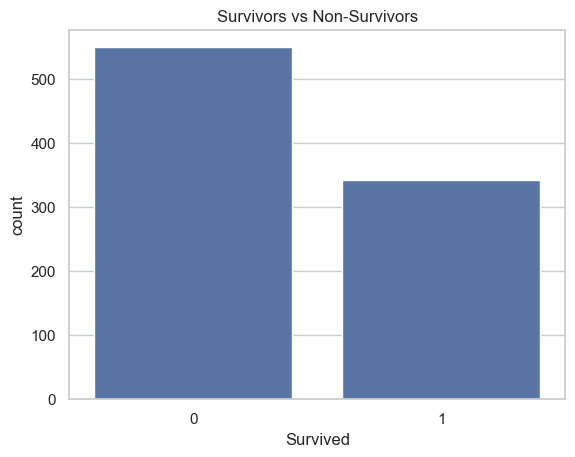

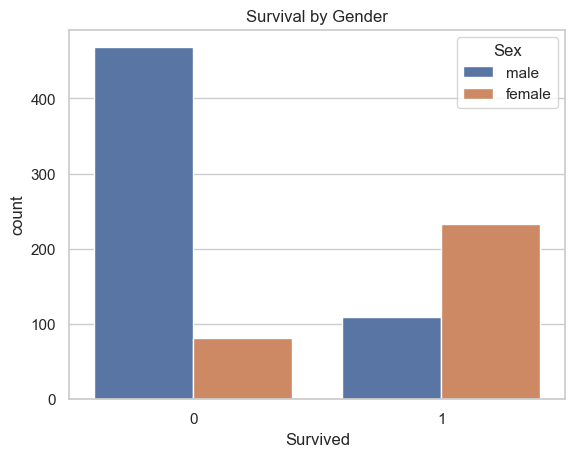

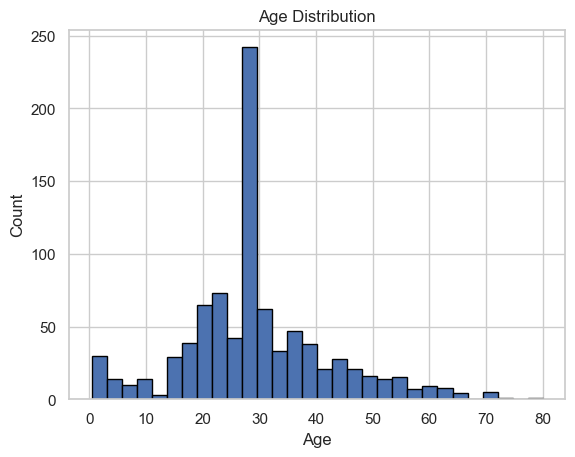

In [32]:

# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survivors vs Non-Survivors")
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

# Age distribution
plt.hist(df['Age'], bins='auto', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Encode categorical variables
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])           # male=1, female=0
df['Embarked'] = label.fit_transform(df['Embarked']) # S=2, C=0, Q=1


##  Model Building
We built and compared between Random Forest Classifier model and Logistic Regression model


Accuracy: 0.82


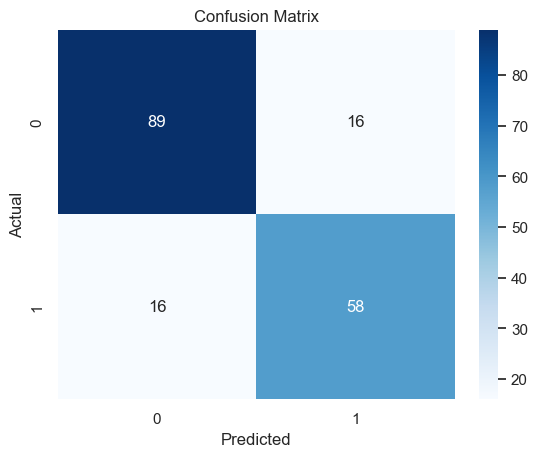

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

Remaining NaNs after cleaning:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Logistic Regression Accuracy: 0.81


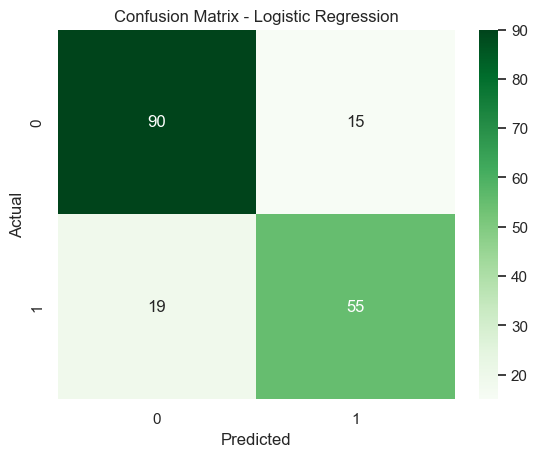

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



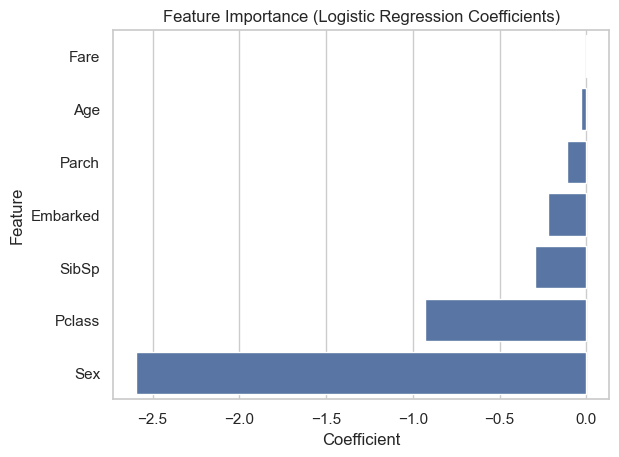

In [33]:
# ------------------ Model Training ------------------ #
# Random Forest Classifier
# Features and label
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure there are no NaNs left
print("Remaining NaNs after cleaning:\n", df.isnull().sum())

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase iterations to ensure convergence
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()



### ROC curve Comparison

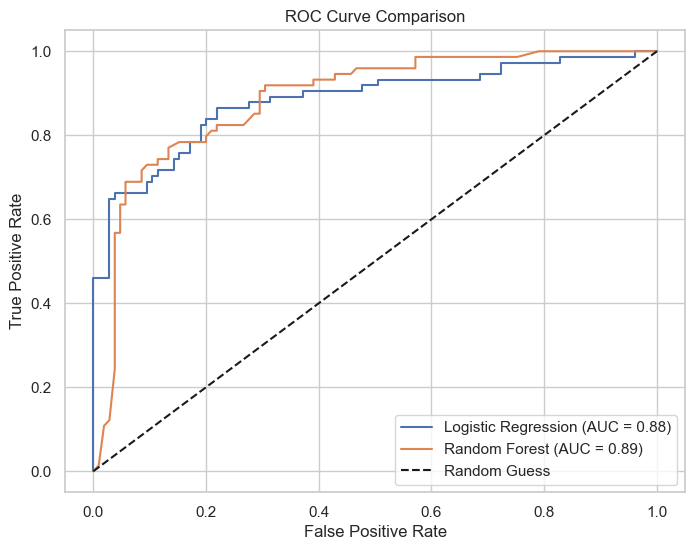

In [34]:
#Code to Generate ROC Curves for Both Models
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_proba_log = logreg.predict_proba(X_test)[:, 1]

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#ROC curves show Random Forest has slightly better true-positive tradeoff than Logistic Regression.

In [ ]:
## Conclusion

## 🔚 Final Model Evaluation Summary

We trained and evaluated two classification models on the Titanic dataset to predict passenger survival.

### Model 1: Random Forest Classifier
- Accuracy: 82%
- Precision (Survived): 0.77
- Recall (Survived): 0.78
- F1-Score (Survived): 0.78

### Model 2: Logistic Regression
- Accuracy: 81%
- Precision (Survived): 0.79
- Recall (Survived): 0.74
- F1-Score (Survived): 0.76

### Conclusion:
- **Random Forest** performed slightly better than Logistic Regression with **higher accuracy and balanced scores** for both classes.
- **Logistic Regression** is simpler and easier to interpret, but slightly underperforms on the "Survived" class compared to Random Forest.
- **Recommendation:** For practical use, **Random Forest** is preferred due to its stronger performance.

### Final Verdict:
Random Forest is the better-performing model for this dataset due to higher accuracy and better balance between precision and recall.

